## Import Package

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import cv2

## Load Dataset

In [2]:
# download mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# shape of data
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

## Preporcess Data

In [4]:
# image
x_train = x_train / 255
x_test = x_test / 255

In [5]:
# label
y_train = tf.one_hot(indices=y_train, depth=10)
y_test = tf.one_hot(indices=y_test, depth=10)

## A Function to Show Image & Predicted Lable

In [6]:
# this function can show images and its labels predicted by model
def show_img_label(images, true_labels, pred_labels):
    
    idx = 0
    
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
    for i in range(5):
        for j in range(5):
            
            true = int(tf.argmax(true_labels[idx]))
            pred = int(tf.argmax(pred_labels[idx]))
            
            if true == pred:
                color = "green"
            else:
                color = "red"
            
            axes[i, j].set_title(label="Label= "+str(true), fontsize=15, color=color)
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
            axes[i, j].imshow(images[idx])
            idx += 1
    
    

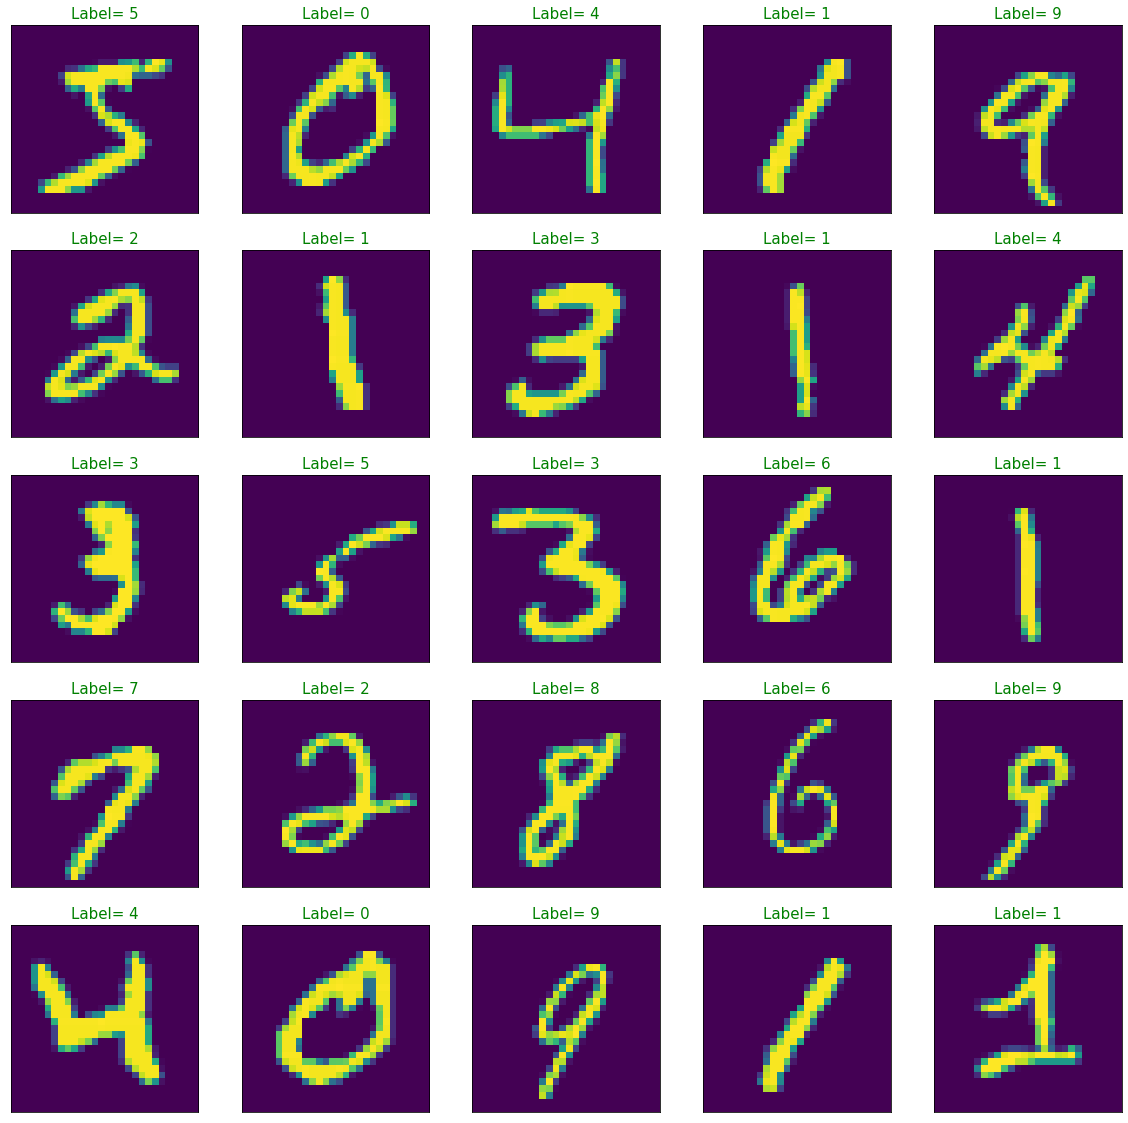

In [7]:
show_img_label(x_train, y_train, y_train)

## Define Model

In [8]:
inputs = keras.layers.Input(shape=(28, 28, 1))

hidden = keras.layers.Conv2D(filters=4, kernel_size=(3, 3), strides=1, padding="same")(inputs)
hidden = keras.layers.BatchNormalization()(hidden)
hidden = keras.layers.Activation("relu")(hidden)
hidden = keras.layers.MaxPooling2D(pool_size=2)(hidden)

hidden = keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding="same")(hidden)
hidden = keras.layers.BatchNormalization()(hidden)
hidden = keras.layers.Activation("relu")(hidden)
hidden = keras.layers.MaxPooling2D(pool_size=2)(hidden)

hidden = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(hidden)
hidden = keras.layers.BatchNormalization()(hidden)
hidden = keras.layers.Activation("relu")(hidden)
hidden = keras.layers.MaxPooling2D(pool_size=2)(hidden)

hidden = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")(hidden)
hidden = keras.layers.BatchNormalization()(hidden)
hidden = keras.layers.Activation("relu")(hidden)
hidden = keras.layers.MaxPooling2D(pool_size=2)(hidden)

hidden = keras.layers.Flatten()(hidden)

hidden = keras.layers.Dropout(rate=0.2)(hidden)
outputs = keras.layers.Dense(units=10, activation="sigmoid")(hidden)

model = keras.models.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(0.0001), metrics=["accuracy"])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 4)         40        
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 4)         16        
_________________________________________________________________
activation (Activation)      (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        592       
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 16)       

## Train Model

In [9]:
model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1326 - accuracy: 0.7946
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0453 - accuracy: 0.9460
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0302 - accuracy: 0.9629
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0232 - accuracy: 0.9717
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0193 - accuracy: 0.9758
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0166 - accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0145 - accuracy: 0.9820
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0131 - accuracy: 0.9834
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0120 - accuracy: 0.9849
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.011

## Evaluation

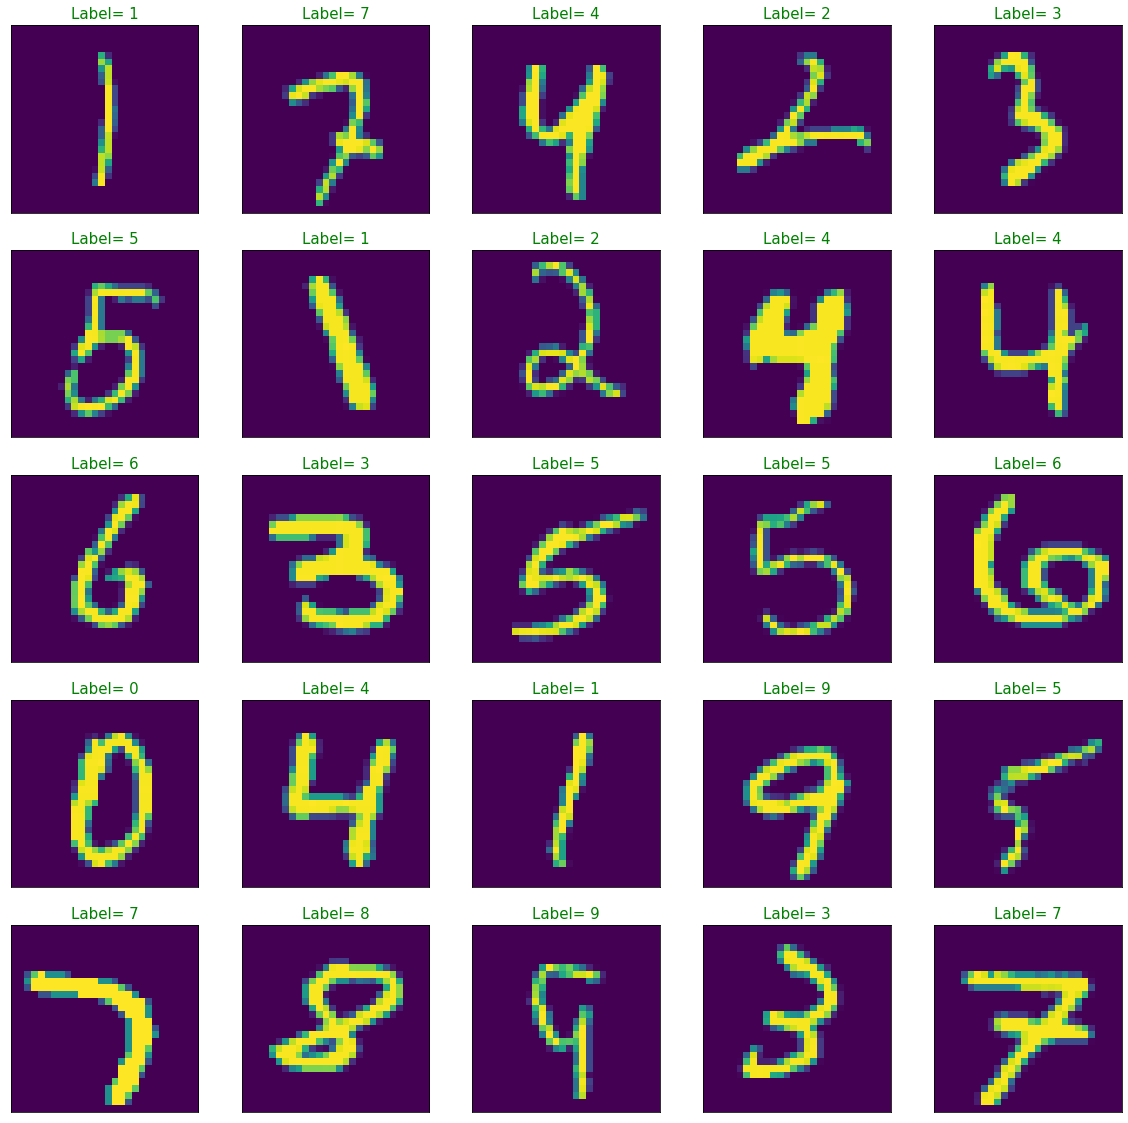

In [10]:
show_img_label(x_test[40:65], y_test[40:65], model.predict(x_test[40:65]))

In [11]:
model.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0087 - accuracy: 0.9871


[0.008746499195694923, 0.9871000051498413]